In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

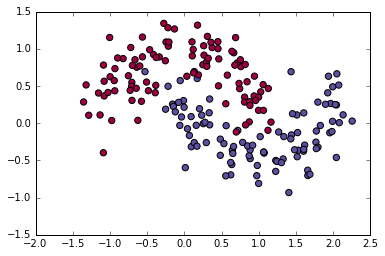

In [2]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [4]:
def plot_decision_boundary(pred_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [19]:
def predict(W1, b1, W2, b2, x):
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exps = np.exp(z2)
    probs = exps / np.sum(exps, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [16]:
def train_model(X, y, num_hidden=5, num_output=2, num_iters=20000, learning_rate=0.01, reg_lambda=0.01):
    N = X.shape[0]
    num_input = X.shape[1]
    W1 = np.random.randn(num_input, num_hidden) / np.sqrt(num_input)
    b1 = np.zeros((1, num_hidden))
    W2 = np.random.randn(num_hidden, num_output) / np.sqrt(num_hidden)
    b2 = np.zeros((1, num_output))
    
    for it in range(num_iters):
        # forward
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exps = np.exp(z2)
        probs = exps / np.sum(exps, axis=1, keepdims=True)
        
        # backward
        delta3 = probs.copy()
        delta3[range(N), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        
        # regularization
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        
        # update
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        
        if it % 1000 == 0:
            logprobs = -np.log(probs[range(N), y])
            loss = np.sum(logprobs)
            loss += 0.5 * reg_lambda * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
            loss /= N
            print 'it', it, 'loss', loss
    
    return W1, b1, W2, b2

In [17]:
W1, b1, W2, b2 = train_model(X, y)

it 0 loss 1.1730220044
it 1000 loss 0.0610750101774
it 2000 loss 0.0537955033815
it 3000 loss 0.0503501241265
it 4000 loss 0.0418871715107
it 5000 loss 0.0419100825124
it 6000 loss 0.0395067960402
it 7000 loss 0.0393836821577
it 8000 loss 0.038553629681
it 9000 loss 0.0382136309509
it 10000 loss 0.0569144087176
it 11000 loss 0.0389460705425
it 12000 loss 0.0385760139673
it 13000 loss 0.0383196778185
it 14000 loss 0.0381191749194
it 15000 loss 0.134083054771
it 16000 loss 0.0386209809678
it 17000 loss 0.0382513317964
it 18000 loss 0.0380112684163
it 19000 loss 0.0387684729982


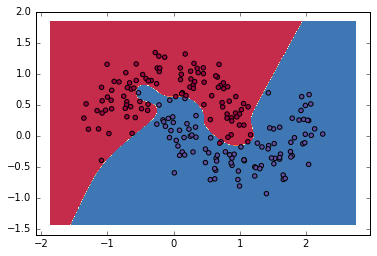

In [20]:
plot_decision_boundary(lambda x: predict(W1, b1, W2, b2, x))